# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('us_births_2016_2021.csv')
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [2]:
df.tail()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
5491,Wyoming,WY,2021,M,"Associate degree (AA, AS)",5,401,29.2,3261.1
5492,Wyoming,WY,2021,M,"Bachelor's degree (BA, AB, BS)",6,657,30.7,3286.0
5493,Wyoming,WY,2021,M,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,261,33.0,3249.3
5494,Wyoming,WY,2021,M,"Doctorate (PhD, EdD) or Professional Degree (M...",8,72,33.3,3262.0
5495,Wyoming,WY,2021,M,Unknown or Not Stated,-9,41,29.2,3177.5


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

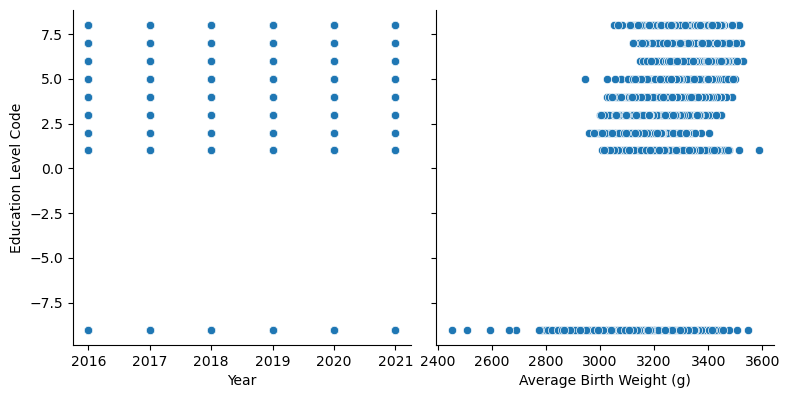

In [3]:
sns.pairplot(df, x_vars=['Year', 'Average Birth Weight (g)'], 
             y_vars='Education Level Code', size=4, aspect=1, kind='scatter')
plt.show()

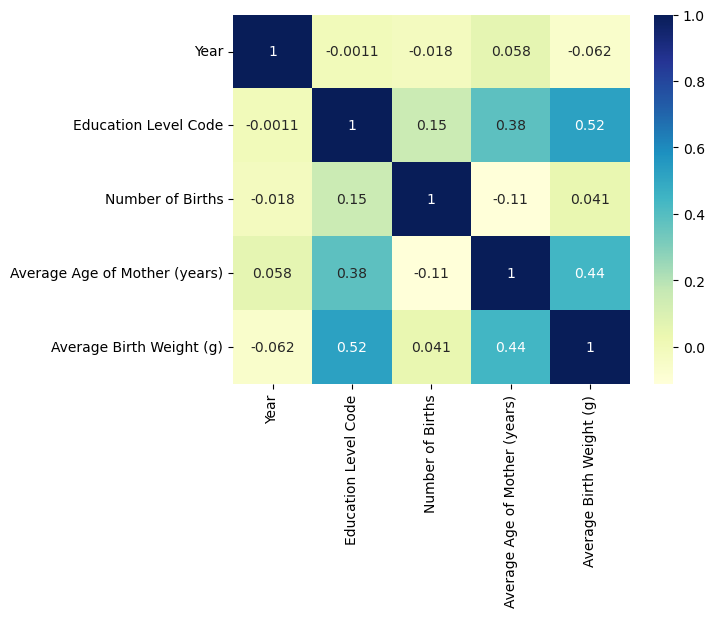

In [4]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [5]:
#creating specific columns for regression 
df2 = df[['Education Level Code', 'Average Birth Weight (g)']]
df2=df2[df2['Education Level Code']!=-9]
df2.head()

,Education Level Code,Average Birth Weight (g)
0,1,3116.9
1,2,3040.0
2,3,3080.0
3,4,3121.9
4,5,3174.3


In [6]:
#create model
x = df2['Average Birth Weight (g)']
y = df2['Education Level Code']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Education Level Code   R-squared:                       0.196
Model:                              OLS   Adj. R-squared:                  0.195
Method:                   Least Squares   F-statistic:                     833.4
Date:                  Mon, 16 Oct 2023   Prob (F-statistic):          3.28e-164
Time:                          12:07:52   Log-Likelihood:                -7331.9
No. Observations:                  3427   AIC:                         1.467e+04
Df Residuals:                      3425   BIC:                         1.468e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -29.1796      1.167    -25.004      0.000     -31.468     -26.891
Average Birth Weight (g)     0.0103      0.000     28.868      0.000       0.010       0.011
==============================================================================
Omnibus:                       50.932   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.319
Skew:                          -0.066   Prob(JB):                     1.58e-07
Kurtosis:                       2.551   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
lr.params

const                      -29.179605
Average Birth Weight (g)     0.010306
dtype: float64

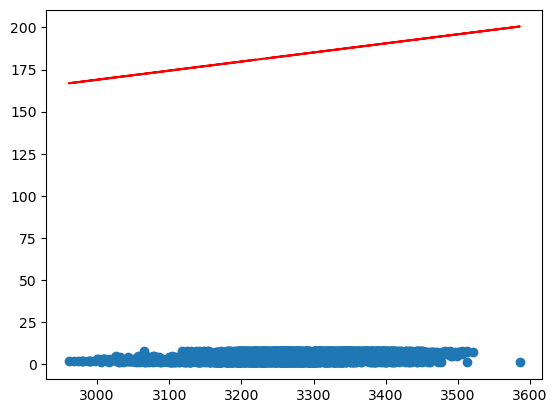

In [9]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [11]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

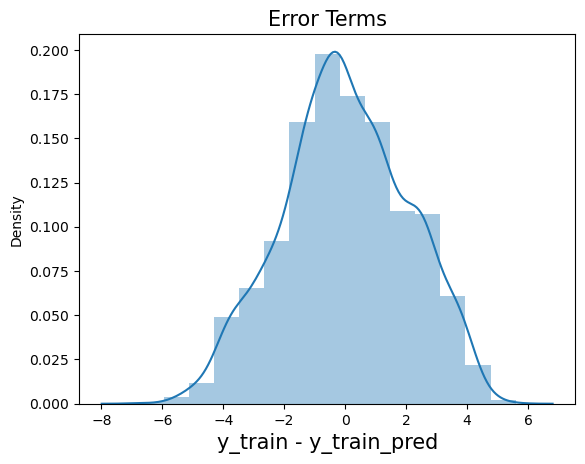

In [12]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [13]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_sm)
y_test_pred

468     4.349515
3212    4.162973
1173    3.129263
2640    5.352307
3842    3.128232
          ...   
2514    6.451978
4241    4.972009
1174    3.150906
1939    5.228633
3142    4.632936
Length: 1469, dtype: float64

In [14]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
print("R^2= ", r_squared)

R^2=  0.2048111158389342


## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 
My R squared value was 0.204 which is a very high level of correlation.
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? 
It was not particularly effective in this case.
3. Was your plot of the error terms a bell curve? 
Yes! My plot of the error terms was a bell curve.